# Quantum Phase Estimation

Quantum Phase Estimation (QPE) is very important subroutine for many other important algorithms. The procedure is that we can prepare two qubit registers, the first one is for the phase estimation and the second one is an arbitrary quantum state which we can access with black box queries. The procedure of the algorithm is to apply a unitaty transformation, which is connected to the secord register state (u). Actually the state is an eigenstate of the unitary gate (U) with eigenvalue 
$$ e^{2 \pi \phi} $$
And the ultimate goal is to estimate this phase. The size of the first register (let it be t) is actually the accuracy with which we will estimate the phase.

This can be done with the help of another important subroutine, the (inverse) Quantum Fourier Transform (QFT). QFT will write the phase from the amplitude of the 1st register in the computational basis of the 1st register state as:
$$ \frac{1}{\sqrt{2^{t/2}}} \sum_{k=0}^{2^t-1} e^{2 \pi i \phi j / N} \ket{j} \ket{u} \rightarrow \ket{\tilde{\phi}} \ket{u} $$

In [154]:
import numpy as np
from qiskit import QuantumCircuit, execute
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT

* We can actually set the state that we will use as target to the controlled gate to state |1> and use the gate T as the part of the controlled gate, since |1> is an eigenstate to this gate/matrix

$$ U \ket{1} = \begin{pmatrix}
1 & 2 & 3\\
a & b & c
\end{pmatrix} \begin{pmatrix}
0 \\
1
\end{pmatrix} = e^{2i\pi \phi} \begin{pmatrix}
0 \\
1
\end{pmatrix} = U \ket{1} $$

where 

$$ U = \begin{pmatrix}
1 & 0 \\
0 & e^{i \phi}
\end{pmatrix} $$

In phi we can use any theta we want

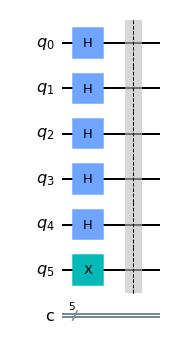

In [155]:
# create the quantum circuit, we will use total of 4 qubits, 3 for the phase estimation and 1 for the eigenstate |1> of gate U
phase_precision = 5

circuit = QuantumCircuit(phase_precision + 1, phase_precision)

# put 4th qubit (#3) to state |1>
circuit.x(phase_precision)

# apply hadamard gate to the phase register
circuit.h(range(phase_precision))

circuit.barrier()

In [156]:
phi = 2 * np.pi / 3

# After the initial set, we apply the controlled gates to the eigenstate 4th qubit
for control_qubit in range(phase_precision):
    # apply the control phase
    for repetitions in range(2 ** control_qubit):
        circuit.cp(phi, control_qubit = control_qubit, target_qubit = phase_precision)

circuit.barrier()

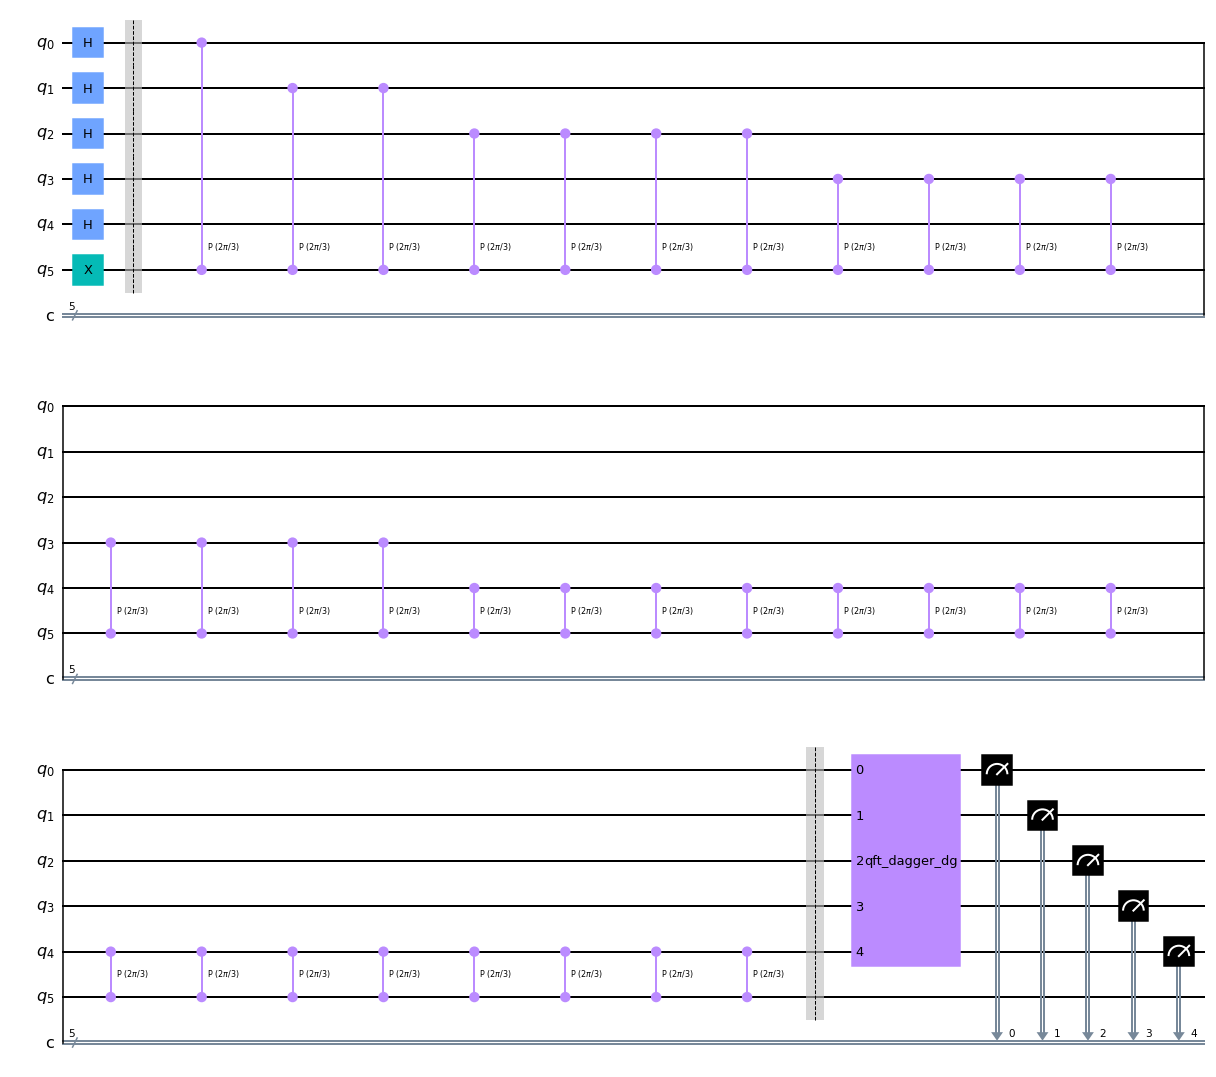

In [157]:
# after applying the controlled gates, we now have the phase encoded in the aplitudes of basis vector |1> of the phase register
# we can apply inverse Quantum Fourier Transform to get the phase with presition phase_precision
circuit.compose(QFT(phase_precision, do_swaps = True, inverse=True, name='qft_dagger'), qubits = range(phase_precision), inplace = True)

# measure the 1st register to get the estimation of the phase
circuit.measure(range(phase_precision), range(phase_precision))

# draw the quantum circuit
%matplotlib inline
circuit.draw('mpl')

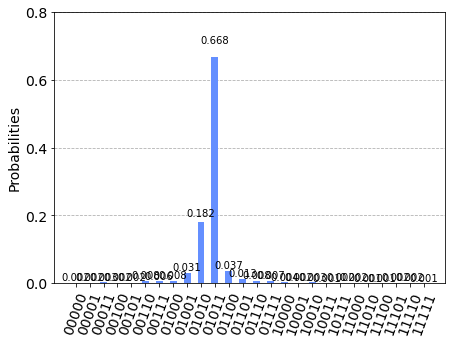

In [158]:
# finally simulate the circuit and get the phase from the measurements
from qiskit import Aer

simulator = simulator = Aer.get_backend('qasm_simulator')

result = execute(circuit, backend = simulator, shots = 1000).result()

counts = result.get_counts()

plot_histogram(counts)

* From the final measurement we get the most possible answer 01011 which means that 

$$ \tilde{\phi} = \frac{1}{2^1} + \frac{1}{2^4} + \frac{1}{2^5} = 0.344 $$

* The angle we used for the rotations, which is the actual phase is

$$ \phi = \frac{1}{3} = 0.333 $$

* So in our result we have an error of 3%